# Assignment 1 



# Write your name and simon email

Please write names below

* [Name]:Nicolas de Souza
* [email]:ndesouza@simon.rochester.edu




# Exercises 





**Exercise 1**

Start by importing pandas, numpy, maplotlib, and loading the data set. 

The dataset has address 

`url= "https://raw.githubusercontent.com/amoreira2/Fin418/main/assets/data/Assignment1.xlsx"`

I strongly recommend you download first and look at the data set.

This file contains multiple sheets, you should use `read_excel` to get the data that contains the 49 value-weighted industry portfolios. 

See here:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html .

Do the followings:

1. Import this dataframe as `df_ind`
    - Use "sheet_name" to select the desired excel sheet. 
    - Use "skip_rows" to skip the initial rows before the data.
    - Figure out what is the code for missing value and change the option `na_values` appropriately
    - If you look at the excel file you will see that there are other data sets stacked horizontally. Use the `usecols` option to select the range of columns you want imported
    - You can take a look at Lab3 material for some examples of importing excel data and using these options.

2. Change the name of the column with the date information to date

3. Use `to_datetime` so python understand the column date as a datetime object (you will have to use the option format)

4. Set date as index

5. Call `df_ind.info()` so you check all the tasks were accomplished.

6. In the next cell, call `df_ind.head()`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.tseries.offsets import MonthEnd

# your code below
url = "https://raw.githubusercontent.com/amoreira2/Fin418/main/assets/data/Assignment1.xlsx"
df_ind = pd.read_excel(url, "49_Industry_Portfolios", skiprows=6, na_values=-99.99, usecols = "A:AW", index_col = 0)
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 192607 to 201507
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Agric   1069 non-null   float64
 1   Food    1069 non-null   float64
 2   Soda    625 non-null    float64
 3   Beer    1069 non-null   float64
 4   Smoke   1069 non-null   float64
 5   Toys    1069 non-null   float64
 6   Fun     1069 non-null   float64
 7   Books   1069 non-null   float64
 8   Hshld   1069 non-null   float64
 9   Clths   1069 non-null   float64
 10  Hlth    553 non-null    float64
 11  MedEq   1069 non-null   float64
 12  Drugs   1069 non-null   float64
 13  Chems   1069 non-null   float64
 14  Rubbr   1009 non-null   float64
 15  Txtls   1069 non-null   float64
 16  BldMt   1069 non-null   float64
 17  Cnstr   1069 non-null   float64
 18  Steel   1069 non-null   float64
 19  FabPr   625 non-null    float64
 20  Mach    1069 non-null   float64
 21  ElcEq   1069 non-null   float64
 22

**Exercise 2. Advanced date manipulation**

1. convert the date from the start of the month to end of the month.

2. call `df_ind.head()` and verify it works

**_Hint:_**

* Read this link: https://stackoverflow.com/questions/37354105/find-the-end-of-the-month-of-a-pandas-dataframe-series.
If you google "pandas end of month" that is the first thing that comes out. Read the answer and apply to your problem.

* you aready set date as index, so you cannot do stuff like `df_ind.date` or `df_ind['date']`  and have to adjust the code accordingly. Think about how to access the index.


In [2]:
# your code below
df_ind.index = pd.to_datetime(df_ind.index, format = '%Y%m')+MonthEnd(1)
df_ind.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin
1926-07-31,2.37,0.12,NaN,-5.19,1.29,8.65,2.50,50.21,-0.48,8.08,...,NaN,7.70,1.94,-23.79,0.07,1.87,4.61,-0.54,2.89,-4.85
1926-08-31,2.23,2.68,NaN,27.03,6.50,16.81,-0.76,42.98,-3.58,-2.51,...,NaN,-2.38,4.88,5.39,-0.75,-0.13,11.83,2.57,5.30,-0.57
1926-09-30,-0.57,1.58,NaN,4.02,1.26,8.33,6.42,-4.91,0.73,-0.51,...,NaN,-5.54,0.06,-7.87,0.25,-0.56,-1.75,0.72,-3.06,-3.14
1926-10-31,-0.46,-3.68,NaN,-3.31,1.06,-1.40,-5.09,5.37,-4.68,0.12,...,NaN,-5.08,-2.64,-15.38,-2.20,-4.11,-11.82,-4.28,-5.74,2.07
1926-11-30,6.75,6.26,NaN,7.29,4.55,0.00,1.82,-6.40,-0.54,1.87,...,NaN,3.84,1.60,4.67,6.52,4.33,-2.97,3.58,2.21,4.92


**Exercise 3. Importing risk-free rate**

1. In this same file there is another sheet with market returns and the risk-free rate. Import them as `df_rmrf` by following all the steps you did in the above two questions

2. Call `df_rmrf.info()` so you check all the tasks were accomplished.

3. In the next cell, call `df_rmrf.head()`

In [3]:
# your code below
url = "https://raw.githubusercontent.com/amoreira2/Fin418/main/assets/data/Assignment1.xlsx"
df_rmrf = pd.read_excel(url, "Market_proxy", skiprows=5, na_values=-99.99, usecols = "A:C", index_col = 0)
df_rmrf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1073 entries, 192607 to 201511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  1073 non-null   float64
 1   RF      1073 non-null   float64
dtypes: float64(2)
memory usage: 25.1 KB


In [4]:
df_rmrf.index = pd.to_datetime(df_rmrf.index, format = '%Y%m')+MonthEnd(1)
df_rmrf.head()

,Mkt-RF,RF
1926-07-31,2.96,0.22
1926-08-31,2.64,0.25
1926-09-30,0.36,0.23
1926-10-31,-3.24,0.32
1926-11-30,2.53,0.31


**Exercise 4. Constructing excess returns A**

1. for the industry `Agric`, construct the excess return by subtracting the risk-free rate RF from it.

2. compute the mean of this excess return. 

3. print it along with the mean of the raw returns and the risk free rate to compare

In [5]:
# your code below
agric_exc = df_ind["Agric"] - df_rmrf["RF"]
print(f'The mean excess return for Agric is {round(agric_exc.mean(),2)}%, '
    f'the raw mean Agric return is {round(df_ind["Agric"].mean(),2)}%, ' 
    f'and the mean risk free rate is {round(df_rmrf["RF"].mean(),2)}%.')


The mean excess return for Agric is 0.68%, the raw mean Agric return is 0.96%, and the mean risk free rate is 0.28%.


**Exercise 5. Constructing excess returns B**

1. construct excess returns for all portfolio by subtracting the risk-free rate from all of columns at the same time
2. name the new data frame `df_inde` ( for excess returns)

**_Hint:_**
* You can do that using the method `.subtract()` with the option axis to tell along which dimension

* Go ahead , google "pandas subtract" to see how this works

In [6]:
# your code below 
df_inde = df_ind.subtract(df_rmrf["RF"], axis=0)
df_inde.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin
1926-07-31,2.15,-0.10,NaN,-5.41,1.07,8.43,2.28,49.99,-0.70,7.86,...,NaN,7.48,1.72,-24.01,-0.15,1.65,4.39,-0.76,2.67,-5.07
1926-08-31,1.98,2.43,NaN,26.78,6.25,16.56,-1.01,42.73,-3.83,-2.76,...,NaN,-2.63,4.63,5.14,-1.00,-0.38,11.58,2.32,5.05,-0.82
1926-09-30,-0.80,1.35,NaN,3.79,1.03,8.10,6.19,-5.14,0.50,-0.74,...,NaN,-5.77,-0.17,-8.10,0.02,-0.79,-1.98,0.49,-3.29,-3.37
1926-10-31,-0.78,-4.00,NaN,-3.63,0.74,-1.72,-5.41,5.05,-5.00,-0.20,...,NaN,-5.40,-2.96,-15.70,-2.52,-4.43,-12.14,-4.60,-6.06,1.75
1926-11-30,6.44,5.95,NaN,6.98,4.24,-0.31,1.51,-6.71,-0.85,1.56,...,NaN,3.53,1.29,4.36,6.21,4.02,-3.28,3.27,1.90,4.61


**Exercise 6. Drop missing observations**

You may notice that excess returns of some industries are not available at the beginning of the sample. 

If we want all the industries to have same period of data in `df_inde`, we need to drop some observations.

Do the followings:

1. Use method `dropna` to drop rows in `df_inde` if **ANY** industry is missing. 

2. After that, `print(df_inde.shape)` to see the changes in the length. 

**_Hint_**
* when you call `dropna` function, use `axis` and `how` option to drop missing values if **ANY** industry is missing

In [7]:
# your code below
df_inde.dropna(axis=0, how='any', inplace=True)
print(df_inde.shape)

(553, 48)


In [8]:
df_inde.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin
1969-07-31,-9.24,-7.49,-4.07,-2.60,-5.29,-8.33,-10.72,-11.59,-3.99,-12.58,...,-4.19,-3.67,-13.02,-10.47,-8.81,-10.88,-6.80,-10.73,-13.79,-10.19
1969-08-31,4.08,4.05,4.97,6.17,3.49,5.89,11.03,9.53,4.25,2.01,...,3.61,5.61,5.08,5.81,7.78,8.36,11.77,8.27,14.97,8.56
1969-09-30,0.52,-1.23,4.60,-1.55,3.52,1.25,0.02,-1.27,-1.16,-3.32,...,-2.46,0.56,-2.23,-0.28,-1.37,-1.64,-3.73,6.39,-4.14,-2.91
1969-10-31,15.62,7.39,6.21,11.03,11.82,5.81,12.44,6.90,5.79,6.71,...,6.63,2.87,4.16,10.60,5.63,8.37,10.14,5.10,3.19,9.55
1969-11-30,-2.82,-1.24,-5.44,-3.34,0.09,-8.80,-4.04,-4.41,-2.95,-3.61,...,-4.03,-2.48,-8.45,-7.23,-4.64,-2.99,-8.58,-5.42,-6.96,-7.22


**Exercise 7. Moments**

We will now estimate the risk-premium in each of these portfolio and the covariance between these portfolios.

Do the followings:

1. using the method `mean` on the excess return data frame to obtain a vector of average excess returns.

2. Using `std` construct an estimator for each asset standard deviation.

2. use `cov` method to estimate the covariance of excess returns.

3. Discuss in each units these variables are



In [9]:
# your code below
ERe = df_inde.mean(axis = 0)
StdRe = df_inde.std(axis = 0)
CovRe = df_inde.cov()

In [10]:
ERe.head()

Agric    0.596926
Food     0.737450
Soda     0.747577
Beer     0.745371
Smoke    1.073165
dtype: float64

In [11]:
StdRe.head()

Agric    6.502605
Food     4.544203
Soda     6.662599
Beer     5.330670
Smoke    6.264143
dtype: float64

In [12]:
CovRe.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin
Agric,42.283870,13.895412,14.346336,15.357792,13.991825,22.845450,25.603373,20.651770,14.086705,22.358837,...,18.620886,18.503279,21.685230,21.671474,18.238354,22.112166,19.847363,18.478277,25.544071,23.456189
Food,13.895412,20.649781,17.140947,16.638740,16.557008,17.881736,19.822838,16.760152,14.755665,19.149684,...,14.980794,14.987057,15.854831,16.244361,17.339216,19.046044,17.648075,17.695633,18.340478,16.088807
Soda,14.346336,17.140947,44.390220,21.477687,16.788400,22.415114,27.409492,21.478002,20.069215,23.433387,...,19.413236,19.693232,19.621829,20.037168,20.471794,23.376182,22.613361,20.757661,24.966746,21.355187
Beer,15.357792,16.638740,21.477687,28.416039,15.240504,20.739552,22.459002,17.438402,18.277620,19.461693,...,17.326730,15.776708,17.770795,17.317937,18.446586,21.071838,18.995298,17.669503,19.610670,18.094191
Smoke,13.991825,16.557008,16.788400,15.240504,39.239493,16.990493,18.312546,14.179440,14.601341,15.830464,...,14.993237,15.251782,13.663776,16.638705,14.092910,16.771839,16.165358,15.322632,16.042678,14.719785


**Exercise 8. Plotting**


Choose a couple of industry portfolios to plot their time-series.

Use the behavior of these two assets to discuss an important economic event in US history

as you discuss make sure to use the magnitudes in your discussion to show that you do understand what this data means



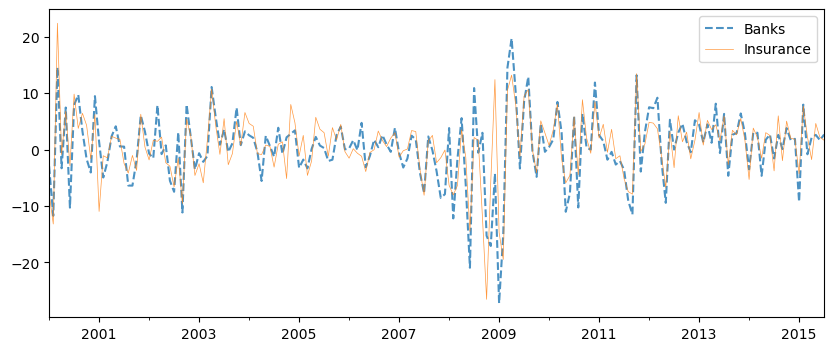

In [13]:
# your code below
fig, ax = plt.subplots(figsize=(10, 4))
df_inde.loc['2000-01-31': ,"Banks"].plot(ax=ax, linestyle="--", alpha=0.8)
df_inde.loc['2000-01-31': ,"Insur"].plot(ax=ax, alpha=0.8, linewidth=0.5)
ax.legend(["Banks", "Insurance"])

**Exercise 9. Cumulative returns**


Choose two industry portfolios to plot the cumulative returns over time.

You can plot for the whole period or just a subperiod. 

You should explain what the numbers mean in terms of how much money people would have if they had invested in these assets

In [14]:
# Creating the cumulative returns matrix
df_gross = 1 + df_inde/100 # Gross returns first
print(df_gross.head())

# Choosing the starting period
t = '2000-01-31'
print(df_gross.loc[t: , ].head())

# Cumulative Returns
df_cum_ret = (df_gross.loc[t: , ].cumprod()-1)*100
print(df_cum_ret.head())

             Agric    Food    Soda    Beer   Smoke    Toys     Fun   Books  \
1969-07-31  0.9076  0.9251  0.9593  0.9740  0.9471  0.9167  0.8928  0.8841   
1969-08-31  1.0408  1.0405  1.0497  1.0617  1.0349  1.0589  1.1103  1.0953   
1969-09-30  1.0052  0.9877  1.0460  0.9845  1.0352  1.0125  1.0002  0.9873   
1969-10-31  1.1562  1.0739  1.0621  1.1103  1.1182  1.0581  1.1244  1.0690   
1969-11-30  0.9718  0.9876  0.9456  0.9666  1.0009  0.9120  0.9596  0.9559   

             Hshld   Clths  ...   Paper   Boxes   Trans   Whlsl   Rtail  \
1969-07-31  0.9601  0.8742  ...  0.9581  0.9633  0.8698  0.8953  0.9119   
1969-08-31  1.0425  1.0201  ...  1.0361  1.0561  1.0508  1.0581  1.0778   
1969-09-30  0.9884  0.9668  ...  0.9754  1.0056  0.9777  0.9972  0.9863   
1969-10-31  1.0579  1.0671  ...  1.0663  1.0287  1.0416  1.1060  1.0563   
1969-11-30  0.9705  0.9639  ...  0.9597  0.9752  0.9155  0.9277  0.9536   

             Meals   Banks   Insur   RlEst     Fin  
1969-07-31  0.8912  0.9320 

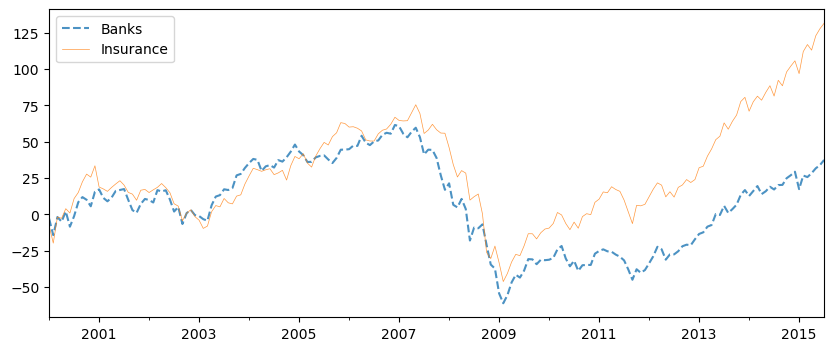

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
df_cum_ret["Banks"].plot(ax=ax, linestyle="--", alpha=0.8)
df_cum_ret["Insur"].plot(ax=ax, alpha=0.8, linewidth=0.5)
ax.legend(["Banks", "Insurance"])